In [31]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pickle

from models.deepst.BikeNYC.exptBikeNYC import use_loaded_model, read_cache
from utils.config import Config
from utils.load_datasets import BikeNYC

In [3]:
model = use_loaded_model()

loading data...
[b'2014040101' b'2014040102' b'2014040103' ... b'2014093022' b'2014093023'
 b'2014093024']
incomplete days:  []
train_data shape:  (3720, 16, 8, 2)
min: 0.0 max: 267.0
XC shape:  (4224, 16, 8, 6) XP shape:  (4224, 16, 8, 2) XT shape:  (4224, 16, 8, 2) Y shape: (4224, 16, 8, 2)
XC shape:  (4224, 16, 8, 6) XP shape:  (4224, 16, 8, 2) XT shape:  (4224, 16, 8, 2) Y shape: (4224, 16, 8, 2)
train shape: (3552, 16, 8, 6) (3552, 16, 8, 2) test shape:  (672, 16, 8, 6) (672, 16, 8, 2)
(3552, 16, 8, 6)
(3552, 16, 8, 2)
(3552, 16, 8, 2)
(3552, 8)

(672, 16, 8, 6)
(672, 16, 8, 2)
(672, 16, 8, 2)
(672, 8)


 days (test):  [b'20140903', b'20140904', b'20140905', b'20140906', b'20140907', b'20140908', b'20140909', b'20140910', b'20140911', b'20140912', b'20140913', b'20140914', b'20140915', b'20140916', b'20140917', b'20140918', b'20140919', b'20140920', b'20140921', b'20140922', b'20140923', b'20140924', b'20140925', b'20140926', b'20140927', b'20140928', b'20140929', b'20140930']

el

In [6]:
len_closeness = 3  # length of closeness dependent sequence
len_period = 1  # length of peroid dependent sequence
len_trend = 1  # length of trend dependent sequence

In [18]:
def load_obj(file_path):
    with open(file_path + '.pkl', 'rb') as f:
        return pickle.load(f)

In [16]:
X_train, Y_train, X_test, Y_test, mmn, external_dim, timestamp_train, timestamp_test = BikeNYC.load_data(
            T=24, nb_flow=2, len_closeness=len_closeness, len_period=len_period, len_trend=len_trend, len_test=24*7*4,
            preprocess_name='preprocessing.pkl', meta_data=True)

[b'2014040101' b'2014040102' b'2014040103' ... b'2014093022' b'2014093023'
 b'2014093024']
incomplete days:  []
train_data shape:  (3720, 16, 8, 2)
min: 0.0 max: 267.0
XC shape:  (4224, 16, 8, 6) XP shape:  (4224, 16, 8, 2) XT shape:  (4224, 16, 8, 2) Y shape: (4224, 16, 8, 2)
XC shape:  (4224, 16, 8, 6) XP shape:  (4224, 16, 8, 2) XT shape:  (4224, 16, 8, 2) Y shape: (4224, 16, 8, 2)
train shape: (3552, 16, 8, 6) (3552, 16, 8, 2) test shape:  (672, 16, 8, 6) (672, 16, 8, 2)
(3552, 16, 8, 6)
(3552, 16, 8, 2)
(3552, 16, 8, 2)
(3552, 8)

(672, 16, 8, 6)
(672, 16, 8, 2)
(672, 16, 8, 2)
(672, 8)



In [24]:
Y_pred = model.predict(X_test)

mmn = load_obj("preprocessing")

data = mmn.inverse_transform(Y_test)
data_pred = np.array(mmn.inverse_transform(Y_pred), dtype=int)

In [27]:
RESULTDIR = "results/"+str(int(datetime.datetime.now().timestamp()))
if os.path.isdir("results") is False:
    os.mkdir("results")
    if os.path.isdir(RESULTDIR) is False:
        os.mkdir(RESULTDIR)

### Print outflow heatmap NYC dataset

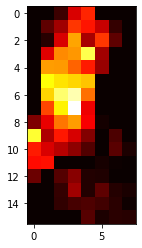

In [32]:
flow = 1
heatmap = data[0, :, :, flow]
for img in data[1:]:
    heatmap += img[:, :, flow]
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.show()

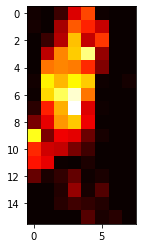

In [33]:
flow = 1
heatmap = data_pred[0, :, :, flow]
for img in data_pred[1:]:
    heatmap += img[:, :, flow]
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.show()

### Print difference using an heatmap between actual data and predicted ones

In [41]:
data_diff = Y_test - Y_pred
# data_diff = np.array(mmn.inverse_transform(data_diff), dtype=int)

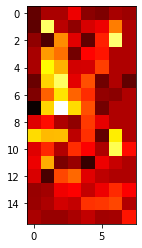

In [42]:
flow = 1
heatmap = data_diff[0, :, :, flow]
for img in data_diff[1:]:
    heatmap += img[:, :, flow]
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.show()

### Plot one week flow for office area

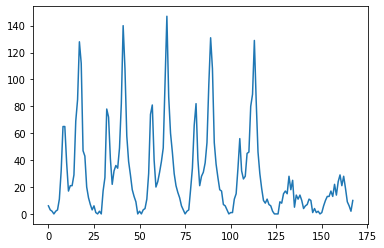

In [61]:
# Apr. 1st to Sept. 30th 2014 last 28 days as test data
start_date = 5
sampling = 24
location = (2,3)
flow = 0

start_date *= sampling
plt.plot(list(range(7*sampling)), data[start_date:start_date+7*sampling,location[0],location[1],flow])

In [49]:
start_date = 4
sampling = 24
location = (30, 24)
flow = 0

start_date *= sampling
plt.plot(list(range(7*sampling)), data[start_date:start_date+7*sampling,location[0],location[1],flow])

IndexError: index 30 is out of bounds for axis 1 with size 16